<a href="https://colab.research.google.com/github/PratikhyaManas/MarketBasketOptimisation/blob/master/Project_1_Car_Purchase_Amount_Predictions_Using_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# STEP #0: LIBRARIES IMPORT


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [27]:
from google.colab import files
uploaded = files.upload()
import io
car_df = pd.read_csv(io.BytesIO(uploaded['Car_Purchasing_Data.csv']),encoding='ISO-8859-1')

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data (1).csv


In [28]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


# STEP #2: VISUALIZE DATASET

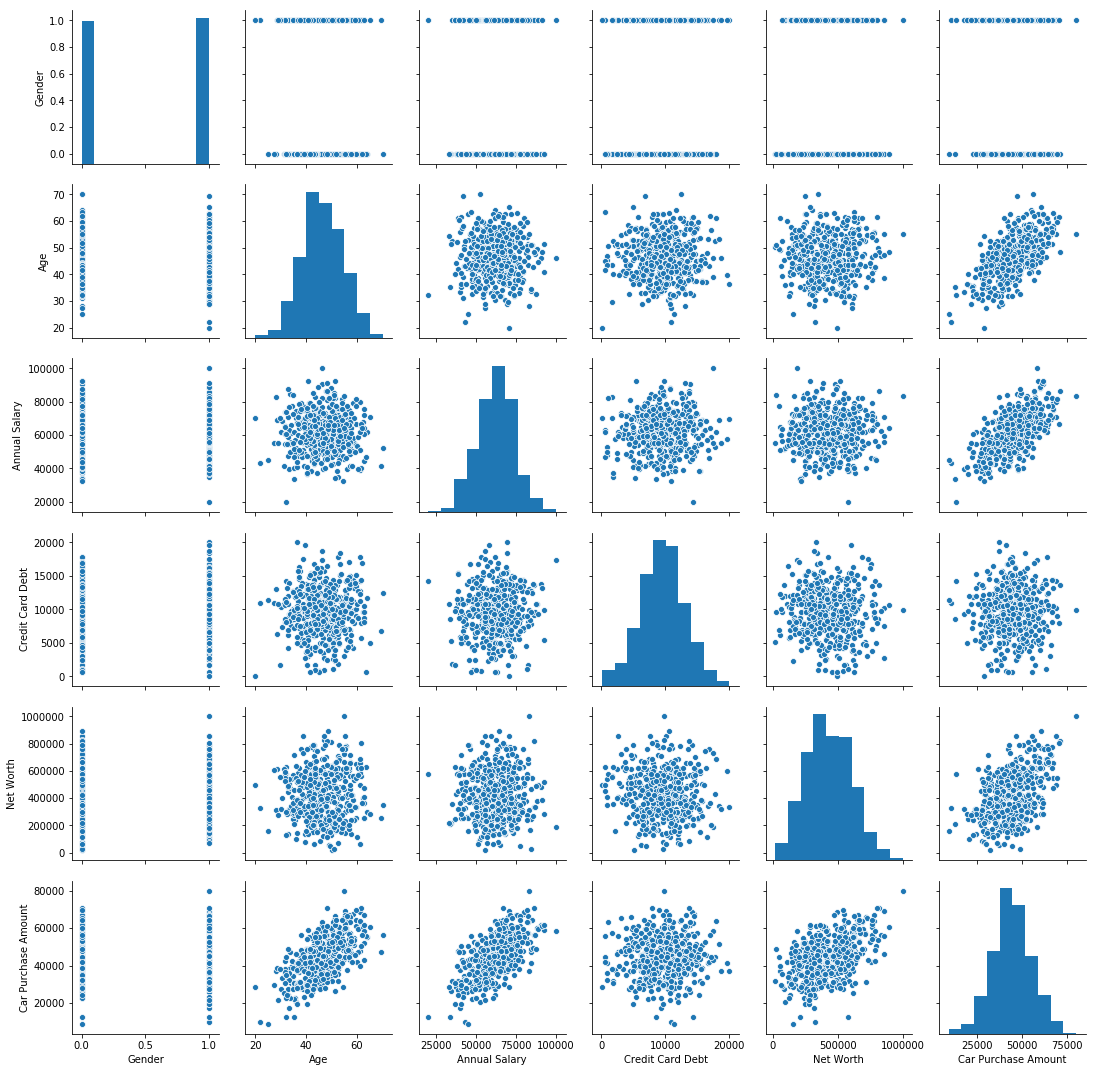

In [29]:
sns.pairplot(car_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [0]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [31]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
5,1,56.824893,68499.85162,14179.472440,428485.3604
6,1,46.607315,39814.52200,5958.460188,326373.1812
7,1,50.193016,51752.23445,10985.696560,629312.4041
8,0,46.584745,58139.25910,3440.823799,630059.0274
9,1,43.323782,53457.10132,12884.078680,476643.3544


In [32]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [35]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [36]:
print(X_scaled[:,0])

[0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.

In [37]:
y.shape

(500,)

In [0]:
y = y.values.reshape(-1,1)

In [39]:
y.shape

(500, 1)

In [0]:
y_scaled = scaler.fit_transform(y)


In [41]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# STEP#4: TRAINING THE MODEL

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [43]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [45]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 0s 891us/step - loss: 0.1038 - val_loss: 0.0429
Epoch 2/20
300/300 [==============================] - 0s 67us/step - loss: 0.0318 - val_loss: 0.0187
Epoch 3/20
300/300 [==============================] - 0s 66us/step - loss: 0.0194 - val_loss: 0.0154
Epoch 4/20
300/300 [==============================] - 0s 67us/step - loss: 0.0143 - val_loss: 0.0097
Epoch 5/20
300/300 [==============================] - 0s 64us/step - loss: 0.0116 - val_loss: 0.0082
Epoch 6/20
300/300 [==============================] - 0s 64us/step - loss: 0.0099 - val_loss: 0.0075
Epoch 7/20
300/300 [==============================] - 0s 66us/step - loss: 0.0087 - val_loss: 0.0067
Epoch 8/20
300/300 [==============================] - 0s 64us/step - loss: 0.0077 - val_loss: 0.0061
Epoch 9/20
300/300 [==============================] - 0s 109us/step - loss: 0.0069 - val_loss: 0.0058
Epoch 10/20
300/300 [=======================

# STEP#5: EVALUATING THE MODEL 

In [46]:
print(epochs_hist.history.keys())


dict_keys(['val_loss', 'loss'])


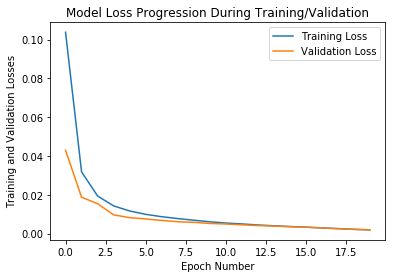

In [47]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [0]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[1, 50, 50000, 10985, 629312]])

In [49]:
y_predict = model.predict(X_Testing)
y_predict.shape

(1, 1)

In [50]:
print('Expected Purchase Amount=', y_predict[:,0])

Expected Purchase Amount= [159498.12]
